In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Step 1: Data Collection and Preprocessing**

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your data
# Assume you have historical option prices and underlying asset prices in CSV files
option_data = pd.read_csv('/content/drive/MyDrive/GirlsScriptOpenSource/Hedging-of-Financial-Derivatives/Machine Learning for Risk-Neutral Density Estimation/synthetic_option_data (2).csv')
underlying_data = pd.read_csv('/content/drive/MyDrive/GirlsScriptOpenSource/Hedging-of-Financial-Derivatives/Machine Learning for Risk-Neutral Density Estimation/synthetic_underlying_data (1).csv')



**Step 2: Feature Engineering**

In [7]:
from datetime import datetime

# Convert dates to datetime
option_data['date'] = pd.to_datetime(option_data['date'])
option_data['expiry_date'] = pd.to_datetime(option_data['expiry_date'])
underlying_data['date'] = pd.to_datetime(underlying_data['date'])

# Calculate time to maturity
option_data['time_to_maturity'] = (option_data['expiry_date'] - option_data['date']).dt.days / 365.0

# Calculate moneyness
option_data['moneyness'] = option_data['strike'] / option_data['underlying_price']

# Feature and target selection
features = ['moneyness', 'time_to_maturity']
target = 'option_price'

X = option_data[features]
y = option_data[target]


**Step 3: Model Training**

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f'Model Loss: {loss}')


Epoch 1/100
20/20 [==============================] - 1s 12ms/step - loss: 105364760.0000 - val_loss: 108720976.0000
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 105341776.0000 - val_loss: 108690768.0000
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 105304304.0000 - val_loss: 108640936.0000
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 105243184.0000 - val_loss: 108561840.0000
Epoch 5/100
20/20 [==============================] - 0s 6ms/step - loss: 105147872.0000 - val_loss: 108441360.0000
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 105005688.0000 - val_loss: 108265648.0000
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 104804616.0000 - val_loss: 108019904.0000
Epoch 8/100
20/20 [==============================] - 0s 8ms/step - loss: 104527184.0000 - val_loss: 107695872.0000
Epoch 9/100
20/20 [==============================] - 0s 6ms/step - loss: 104167

In [9]:
# Predict option prices using the trained model
y_pred = model.predict(X_test_scaled)

# Assuming a method to estimate risk-neutral density from predicted option prices
def estimate_risk_neutral_density(predicted_prices):
    # Placeholder for actual density estimation logic
    density = np.histogram(predicted_prices, bins=50, density=True)[0]
    return density

risk_neutral_density = estimate_risk_neutral_density(y_pred)


7/7 [==============================] - 0s 3ms/step


**Step 5: Hedging Strategy**

In [10]:
# Example: Delta Hedging using the estimated density
def delta_hedging_strategy(risk_neutral_density, data):
    # Placeholder for hedging logic
    hedging_positions = risk_neutral_density  # Replace with actual logic
    return hedging_positions

hedging_positions = delta_hedging_strategy(risk_neutral_density, option_data)

# Evaluate hedging performance
def evaluate_hedging_performance(hedging_positions, data):
    # Placeholder for performance evaluation logic
    performance_metrics = np.var(hedging_positions)  # Replace with actual logic
    return performance_metrics

performance_metrics = evaluate_hedging_performance(hedging_positions, option_data)
print(f'Hedging Performance: {performance_metrics}')


Hedging Performance: 8.847787140146496e-09


**Step 6: Visualization**

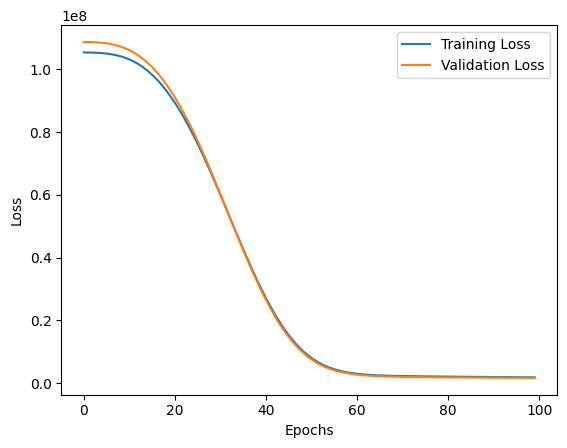

In [13]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

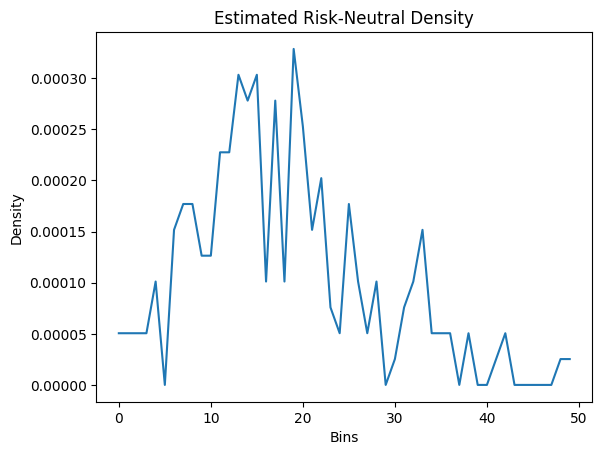

In [12]:
# Plot risk-neutral density
plt.plot(risk_neutral_density)
plt.xlabel('Bins')
plt.ylabel('Density')
plt.title('Estimated Risk-Neutral Density')
plt.show()
